In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 

from torch import nn
from classes import *

In [ ]:
quantidade_camadas = 5
quantidade_neuronios = 400
amostras = 250_000

model = DeepONet(
    [84] + (quantidade_camadas + 1) * [quantidade_neuronios],
    [1] + (quantidade_camadas + 1) * [quantidade_neuronios],
    torch.relu
)
model.load(f'modelos2/model{amostras}-1500.pt')
#model = model.cpu()

module = Module_DeepONet(model, nn.MSELoss())
module.load_database('base dados/data60000.dat')
module.evaluate()
#module.trainning(10_000, 'model', 250, batch_size = 64, epochs = 1000, learning_rate = 1e-3, percent = 0.8)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

0.0003159872740553692 0.00037217305647209285


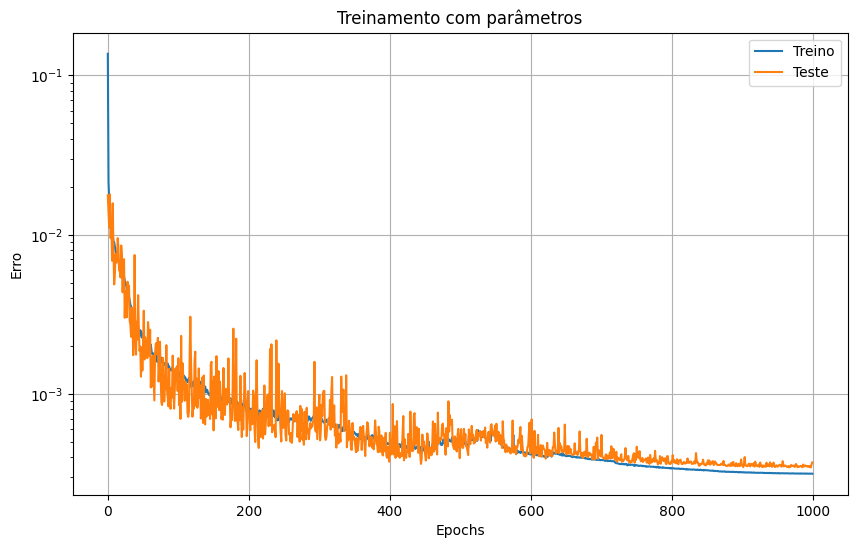

In [13]:
amostras = 250_000

with open(f'model/trainning{amostras}-1000.dat', 'rb') as arq: loss_history = np.load(arq)

print(loss_history[0][-1], loss_history[1][-1])

fig, ax = plt.subplots(figsize = (10, 6))

plt.plot(loss_history[0], label = 'Treino')
plt.plot(loss_history[1], label = 'Teste')

plt.title('Treinamento com parâmetros')
plt.xlabel('Epochs')
plt.ylabel('Erro')

plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

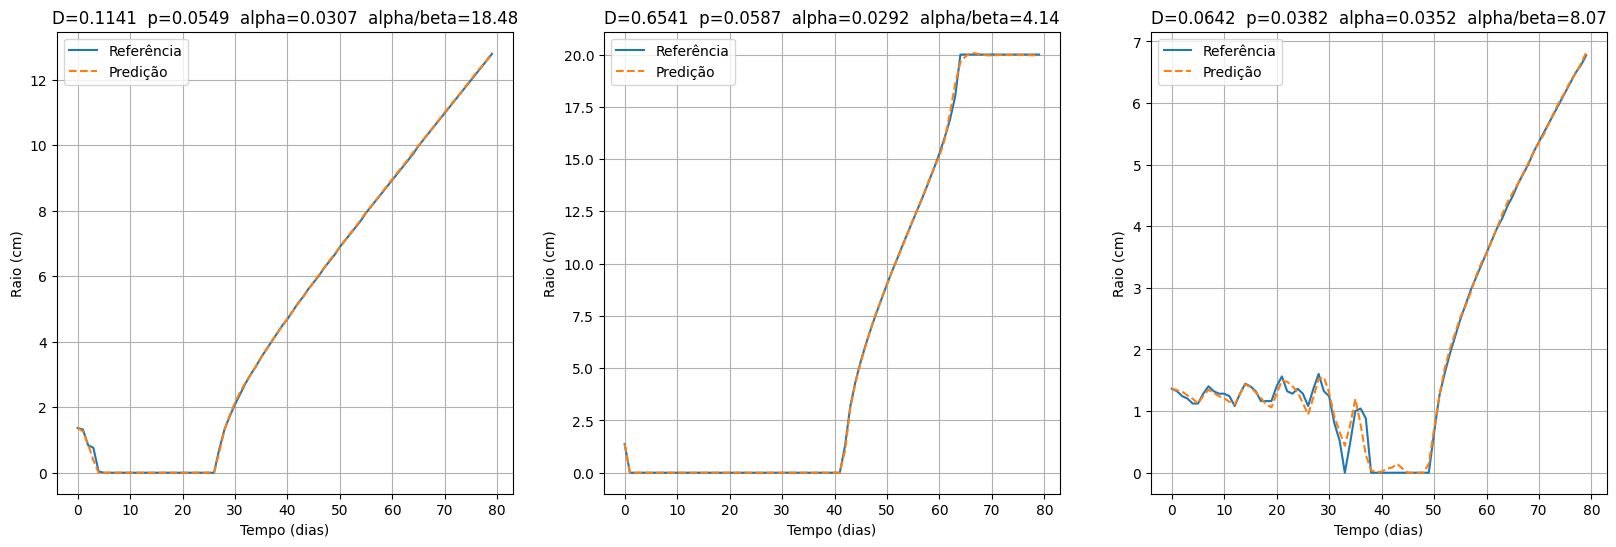

In [14]:
pred, ref = module.get_results()
fig, ax = plt.subplots(ncols=3, figsize = (20, 6))

k = 33
for i in range(3):

    ax[i].plot(ref[k], label = 'Referência')
    ax[i].plot(pred[k], label = 'Predição', linestyle = 'dashed')

    ax[i].set_title(f'D={module.database[0][k, -4]:.4f}  p={module.database[0][k, -3]:.4f}  alpha={module.database[0][k, -2]:.4f}  alpha/beta={module.database[0][k, -1]:.2f}')
    ax[i].set_xlabel('Tempo (dias)')
    ax[i].set_ylabel('Raio (cm)')

    ax[i].legend()
    ax[i].grid()

    k += 4



Erro: 4.348890315741301


C:\Users\rique\AppData\Local\Temp\ipykernel_18948\1462150229.py:19: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  ax[1].plot(abs(ref[i] - pred[i]))


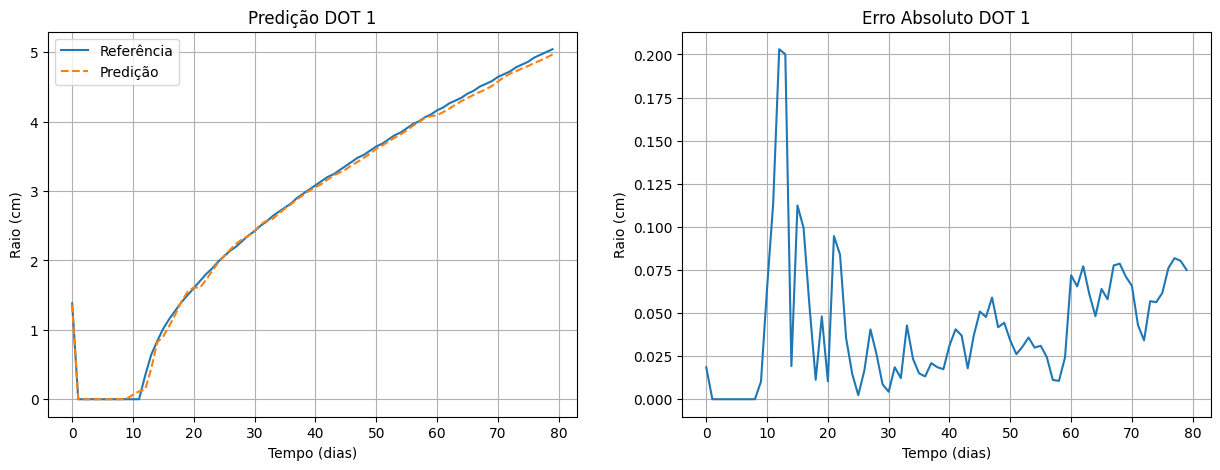

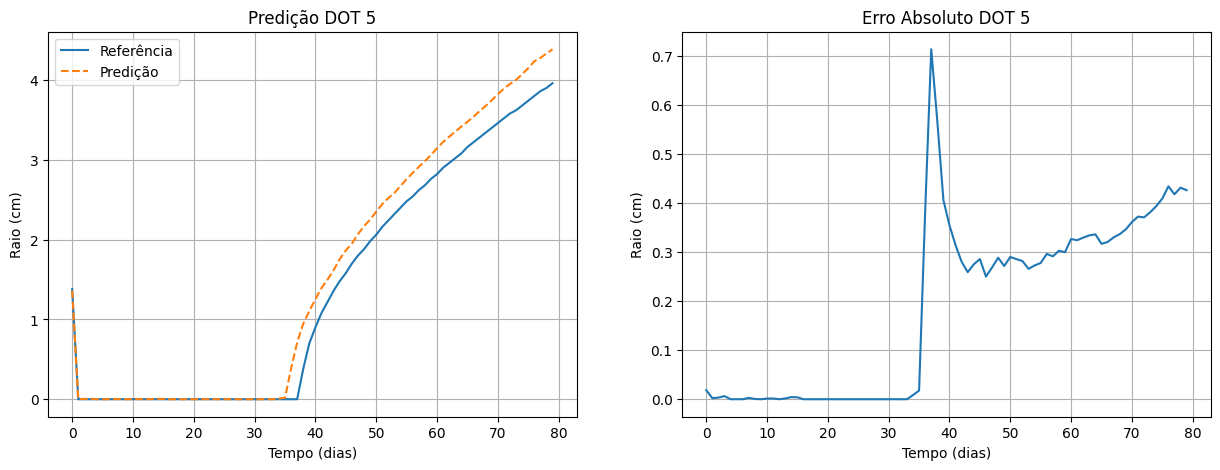

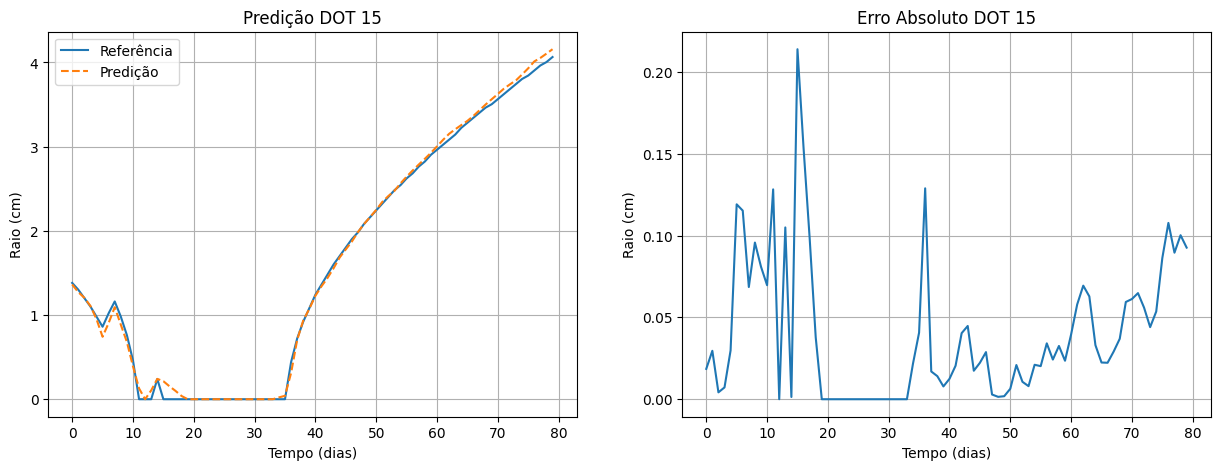

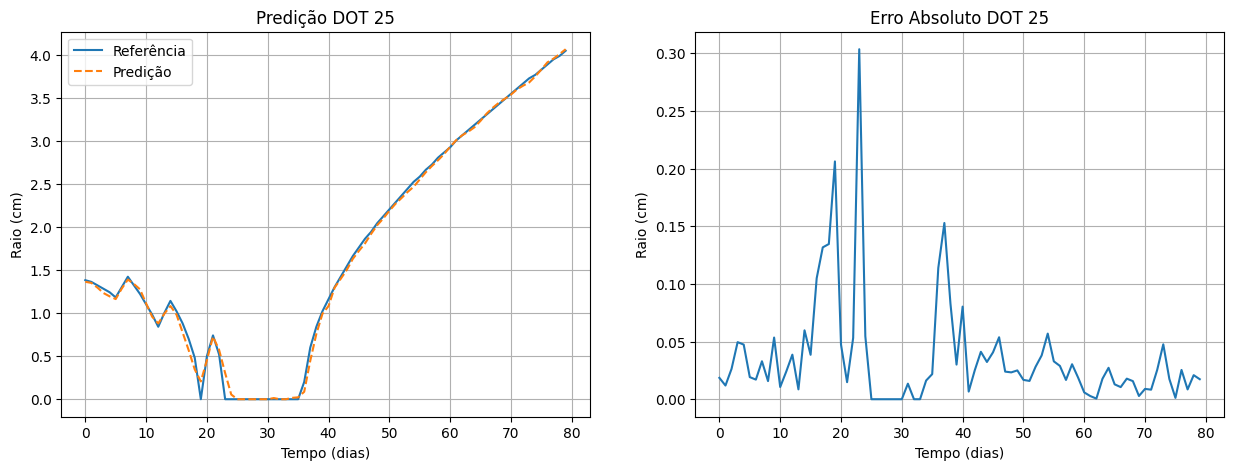

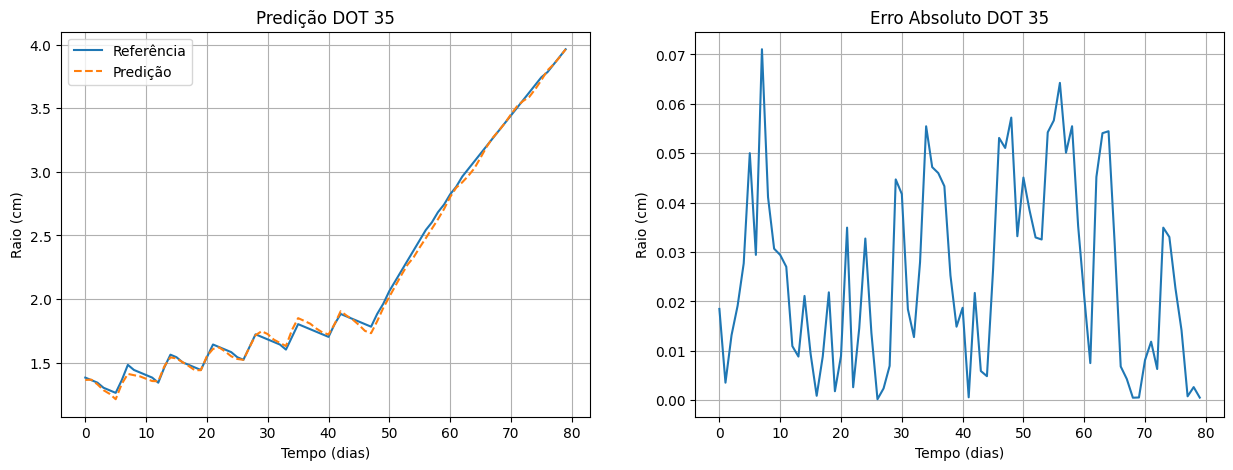

In [15]:
module.load_database('base dados/validacao.dat')
print(f'Erro: {module.evaluate()}')
pred, ref = module.get_results()

dot = [1, 5, 15, 25, 35]
for i in range(5):

    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

    ax[0].plot(ref[i], label='Referência')
    ax[0].plot(pred[i], label='Predição', linestyle = 'dashed')
    ax[0].set_title(f'Predição DOT {dot[i]}')
    ax[0].grid()
    ax[0].legend()

    ax[0].set_xlabel('Tempo (dias)')
    ax[0].set_ylabel('Raio (cm)')

    ax[1].plot(abs(ref[i] - pred[i]))
    ax[1].set_title(f'Erro Absoluto DOT {dot[i]}')
    ax[1].grid()

    ax[1].set_xlabel('Tempo (dias)')
    ax[1].set_ylabel('Raio (cm)')

    plt.show()

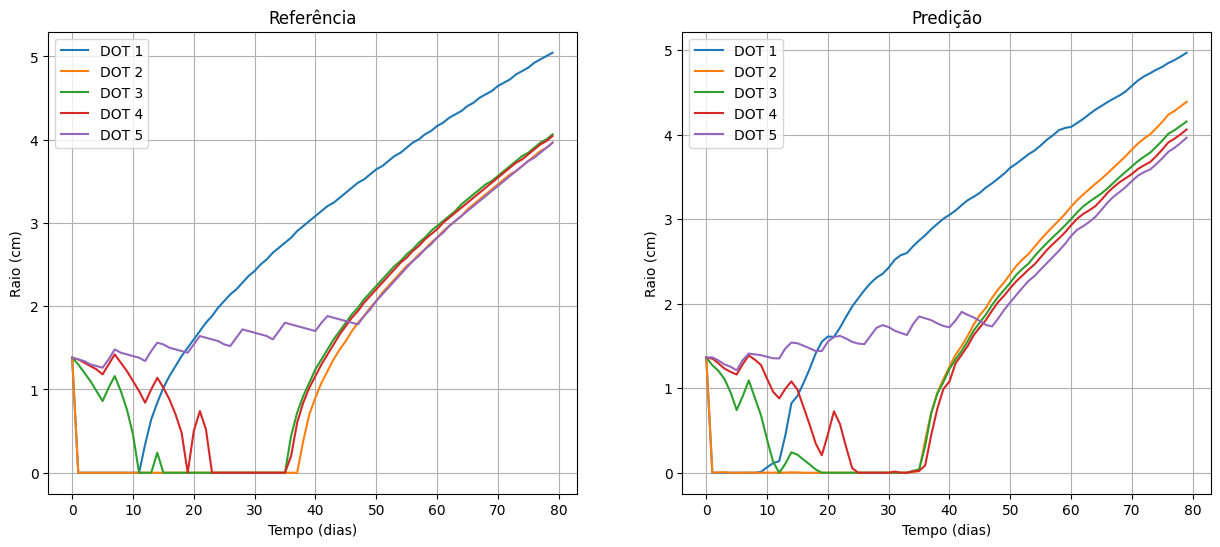

In [16]:
fig, ax = plt.subplots(ncols=2, figsize = (15, 6))

for i in range(5): ax[0].plot(ref[i], label = f'DOT {i+1}')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Referência')
ax[0].set_xlabel('Tempo (dias)')
ax[0].set_ylabel('Raio (cm)')


for i in range(5): ax[1].plot(pred[i], label = f'DOT {i+1}')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Predição')
ax[1].set_xlabel('Tempo (dias)')
ax[1].set_ylabel('Raio (cm)')

plt.show()